In [29]:
pip install matplotlib

     |████████████████████████████████| 7.3 MB 4.6 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 5.1 MB/s  eta 0:00:01
     |████████████████████████████████| 2.8 MB 30.4 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 28.7 MB/s eta 0:00:01
     |████████████████████████████████| 232 kB 89.0 MB/s eta 0:00:01
You should consider upgrading via the '/Users/suyash/.pyenv/versions/3.8.10/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install scipy

     |████████████████████████████████| 28.8 MB 2.9 MB/s eta 0:00:01
You should consider upgrading via the '/Users/suyash/.pyenv/versions/3.8.10/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('./dataset/2016-mlb-homeruns.csv')

df.drop_duplicates()

# Handle missing values
# df = df.fillna(method='ffill')  # Forward fill as an example

df = df.drop(columns=["video"])

In [27]:
# Display basic information about the datasetprint()
df.info()

# # View the first few rows
# df.head()

# # Check for missing values
# df.isnull().sum()

# # Check for duplicate rows
# df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 5497 entries, 0 to 5498
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   play_id       5497 non-null   object 
 1   title         5497 non-null   object 
 2   ExitVelocity  5497 non-null   float64
 3   HitDistance   5497 non-null   float64
 4   LaunchAngle   5497 non-null   float64
dtypes: float64(3), object(2)
memory usage: 257.7+ KB


In [3]:
# Fill missing values with the column mean
df["ExitVelocity"] = df["ExitVelocity"].fillna(df["ExitVelocity"].mean())
df["HitDistance"] = df["HitDistance"].fillna(df["HitDistance"].mean())
df["LaunchAngle"] = df["LaunchAngle"].fillna(df["LaunchAngle"].mean())
df = df.dropna(subset=["title"])

In [4]:
# Check and convert data types if necessary
df["ExitVelocity"] = pd.to_numeric(df["ExitVelocity"], errors="coerce")
df["HitDistance"] = pd.to_numeric(df["HitDistance"], errors="coerce")
df["LaunchAngle"] = pd.to_numeric(df["LaunchAngle"], errors="coerce")

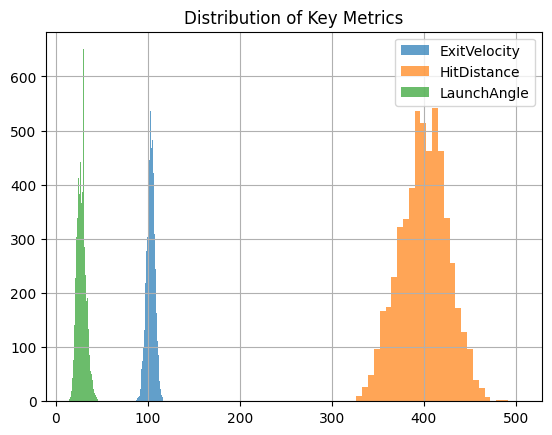

In [13]:
import matplotlib.pyplot as plt

# Plot histograms
df["ExitVelocity"].hist(bins=30, alpha=0.7, label="ExitVelocity")
df["HitDistance"].hist(bins=30, alpha=0.7, label="HitDistance")
df["LaunchAngle"].hist(bins=30, alpha=0.7, label="LaunchAngle")
plt.legend()
plt.title("Distribution of Key Metrics")
plt.show()

In [9]:
from scipy.stats import zscore

# Calculate Z-scores
df['HitDistance_zscore'] = zscore(df['HitDistance'])

# Identify potential outliers
outliers = df[df['HitDistance_zscore'].abs() > 3]
print(outliers.count())

play_id               104
title                 104
ExitVelocity          104
HitDistance           104
LaunchAngle           104
HitDistance_zscore    104
dtype: int64


In [12]:
# Remove outliers
df = df[df['HitDistance_zscore'].abs() <= 3]

In [11]:
df.head(10)

,play_id,title,ExitVelocity,HitDistance,LaunchAngle,HitDistance_zscore
0,5b254850-9e14-48d2-8baf-c3e12ecbe68d,John Jaso homers (6) on a fly ball to center f...,102.9,412.0,25.0,0.327006
1,0110e760-5d49-4c53-ad29-e74c787c038d,Evan Longoria homers (34) on a fly ball to lef...,103.1,423.0,31.0,0.509790
2,3b9ecf94-e3fe-4d79-8b33-efe174dfa53e,Marwin Gonzalez homers (13) on a line drive to...,106.6,390.0,22.0,-0.038564
3,bda1cb83-dca9-46b2-aaad-6c1f009cd51c,Eddie Rosario homers (10) on a fly ball to rig...,98.5,368.0,30.0,-0.404133
4,9f87e907-3c4f-4187-8fb0-d6784b3b1f1a,Marcus Semien homers (26) on a fly ball to lef...,106.0,435.0,32.0,0.709192
5,0208ab5b-2ff5-4bc0-9a73-2a6a7b45dcae,Ryan Zimmerman homers (15) on a line drive to ...,101.5,384.0,24.0,-0.138265
6,8305de36-508a-4d5a-acd1-661fa32061d2,Ehire Adrianza homers (2) on a fly ball to rig...,95.0,0.0,38.0,-6.519113
7,d46efa1e-5489-46bb-a2ec-953258b12bdc,Jose Reyes homers (8) on a line drive to right...,103.2,397.0,23.0,0.077754
8,fcfc3d82-32dc-40c6-b023-d7ea86633537,Nomar Mazara homers (18) on a fly ball to righ...,104.4,398.0,37.0,0.094371
9,47b7968f-59f5-4dbd-900e-652a9ebf2387,Evan Longoria homers (33) on a fly ball to cen...,103.2,423.0,26.0,0.509790


In [14]:
import re

# Define a function to extract names
def extract_name(title):
    # Extract text before the first word like "homers", "flies", etc.
    match = re.search(r'^(.*?)\s(?:homers|flies|doubles|triples|singles)', title, re.IGNORECASE)
    return match.group(1) if match else None

# Apply the function to the title column
df['PlayerName'] = df['title'].apply(extract_name)

# Display the dataframe to verify
print(df[['title', 'PlayerName']].head())

                                               title       PlayerName
0  John Jaso homers (6) on a fly ball to center f...        John Jaso
1  Evan Longoria homers (34) on a fly ball to lef...    Evan Longoria
2  Marwin Gonzalez homers (13) on a line drive to...  Marwin Gonzalez
3  Eddie Rosario homers (10) on a fly ball to rig...    Eddie Rosario
4  Marcus Semien homers (26) on a fly ball to lef...    Marcus Semien


In [15]:
df.head()

,play_id,title,ExitVelocity,HitDistance,LaunchAngle,HitDistance_zscore,PlayerName
0,5b254850-9e14-48d2-8baf-c3e12ecbe68d,John Jaso homers (6) on a fly ball to center f...,102.9,412.0,25.0,0.327006,John Jaso
1,0110e760-5d49-4c53-ad29-e74c787c038d,Evan Longoria homers (34) on a fly ball to lef...,103.1,423.0,31.0,0.509790,Evan Longoria
2,3b9ecf94-e3fe-4d79-8b33-efe174dfa53e,Marwin Gonzalez homers (13) on a line drive to...,106.6,390.0,22.0,-0.038564,Marwin Gonzalez
3,bda1cb83-dca9-46b2-aaad-6c1f009cd51c,Eddie Rosario homers (10) on a fly ball to rig...,98.5,368.0,30.0,-0.404133,Eddie Rosario
4,9f87e907-3c4f-4187-8fb0-d6784b3b1f1a,Marcus Semien homers (26) on a fly ball to lef...,106.0,435.0,32.0,0.709192,Marcus Semien


In [ ]:
# To build a platform predicting a prospect’s MLB potential and projecting career impact based on current performance and historical comparisons, here’s a step-by-step approach you can follow:

# 1. Define the Problem and Objectives
# 	•	Primary Objective: Predict a player’s potential and project career impact based on data such as hitting metrics, pitching stats, fielding performance, and historical comparisons.
# 	•	Key Outputs:
# 	•	Predict prospect rankings.
# 	•	Project potential metrics like WAR (Wins Above Replacement), home runs, batting average, etc.
# 	•	Generate insights and comparisons with similar players historically.

# 2. Data Collection

# Gather and organize relevant data:
# 	•	Performance Data:
# 	•	Exit velocity, launch angle, pitch velocity, batting average, on-base percentage (OBP), slugging percentage (SLG), etc.
# 	•	Player Metrics:
# 	•	Physical attributes like age, height, weight, handedness (bat/throw).
# 	•	Historical Data:
# 	•	Historical player stats and career trajectories for comparison.
# 	•	Advanced Stats:
# 	•	WAR, BABIP, FIP, OPS+, etc.
# 	•	Scouting Data:
# 	•	Grades from scouts (speed, power, defense, etc.).
# 	•	External Sources:
# 	•	MLB Statcast, retrosheet.org, FanGraphs, or Baseball Savant for advanced analytics.

# 3. Exploratory Data Analysis (EDA)
# 	•	Identify Key Trends: Analyze correlations between stats like exit velocity, launch angle, and player success metrics.
# 	•	Historical Benchmarks:
# 	•	Compare current prospects to historical player performance using clustering or similarity measures.
# 	•	Outlier Handling:
# 	•	Cleanse data of anomalies to ensure high prediction accuracy.

# 4. Feature Engineering
# 	•	Create meaningful features that encapsulate performance:
# 	•	Rolling averages for recent performance (last 10, 50, 100 plate appearances).
# 	•	Career progression rates (improvement in key stats year-over-year).
# 	•	Metrics like OPS+, ERA+ (adjusted for league and park effects).
# 	•	Player age vs. league average for development projections.
# 	•	Similarity Features:
# 	•	Calculate similarity scores with historical players using cosine similarity, Manhattan distance, or clustering techniques.

# 5. Model Development
# 	•	Model Goals:
# 	•	Predict future performance metrics (e.g., WAR, batting average).
# 	•	Rank prospects based on predicted career impact.
# 	•	Model Types:
# 	•	Regression: Predict continuous variables like WAR, home runs, etc.
# 	•	Algorithms: XGBoost, LightGBM, Linear Regression.
# 	•	Classification: Categorize prospects into tiers (e.g., All-Star, Solid Starter, Bench).
# 	•	Algorithms: Random Forest, Logistic Regression.
# 	•	Time Series: Use LSTM/GRU models to predict performance progression over time.
# 	•	Advanced Models:
# 	•	Build a neural network or ensemble models (e.g., stacking) to capture complex relationships.

# 6. Historical Comparisons
# 	•	Player Similarity Model:
# 	•	Use clustering (e.g., K-means) or dimensionality reduction (e.g., PCA, t-SNE) to group players with similar profiles.
# 	•	Compare prospects with historically successful players who had similar metrics at the same age/stage of career.
# 	•	Generate player comparisons like “This player is similar to Mike Trout at age 20.”

# 7. Evaluation Metrics
# 	•	Evaluate model performance using:
# 	•	Regression:
# 	•	Mean Absolute Error (MAE), Root Mean Square Error (RMSE).
# 	•	Classification:
# 	•	Accuracy, Precision, Recall, F1-Score, ROC-AUC.
# 	•	Rank Prediction:
# 	•	Rank Correlation (Spearman/Pearson).
# 	•	Validate on a test set using cross-validation.

# 8. Deployment & Visualization
# 	•	Platform Design:
# 	•	Build a web app/dashboard using frameworks like Streamlit, Dash, or Next.js.
# 	•	Key Features:
# 	•	Player prediction interface (input current stats, get career projections).
# 	•	Player comparison dashboard with historical data visualization.
# 	•	Rankings and projected metrics displayed dynamically.
# 	•	Visualization:
# 	•	Use libraries like matplotlib, seaborn, plotly, or D3.js for interactive charts and player trajectories.

# 9. Scalability
# 	•	Integrate live data updates (e.g., API feeds from MLB Statcast or other sources).
# 	•	Continuously train models using new data as players’ careers progress.
# 	•	Implement backend pipelines for data cleaning and storage (e.g., AWS S3, PostgreSQL).

# 10. Next Steps
# 	•	Immediate Tasks:
# 	•	Clean your dataset (you’ve started with Z-score handling).
# 	•	Extract key player stats from available data.
# 	•	Perform EDA to uncover trends.
# 	•	Medium-Term Tasks:
# 	•	Build a baseline model (e.g., regression for WAR projection).
# 	•	Implement player similarity scoring with historical data.
# 	•	Final Steps:
# 	•	Create a user-facing platform for predictions and insights.

# Would you like help setting up the model pipeline, generating similarity scores, or designing the platform in Streamlit?